Data loaded successfully.

Initial data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB
None

Missing values before handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values after handling:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Cleaned and Preprocessed Data:
                Open      High       Low     Close  Adj Close    Volume  Year  \
Date                                                                 

C:\Users\HDC0422279\AppData\Local\Temp\ipykernel_4512\2471768543.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


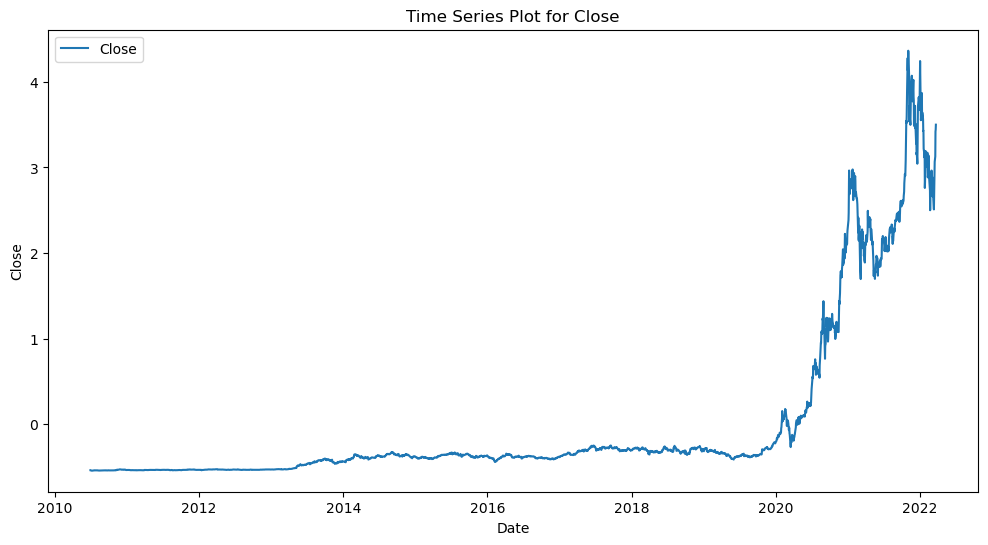

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = pd.read_csv("C:/Users/HDC0422279/Downloads/TSLA.csv")

# Step 1: Load the time series data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    print("Data loaded successfully.")
    return data

# Step 2: Inspect and clean the data
def clean_data(data):
    print("\nInitial data info:")
    print(data.info())

    # Remove duplicates
    data = data[~data.index.duplicated(keep='first')]

    # Handle missing values
    print("\nMissing values before handling:")
    print(data.isnull().sum())
    data = data.fillna(method='ffill').fillna(method='bfill')

    # Recheck missing values
    print("\nMissing values after handling:")
    print(data.isnull().sum())

    return data

# Step 3: Preprocess the data
def preprocess_data(data):
    # Normalize numerical columns
    for col in data.select_dtypes(include=[np.number]).columns:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

    # Extract time-based features
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['Day_of_Week'] = data.index.dayofweek

    return data

# Step 4: Visualize the time series data
def visualize_data(data, column):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label=column)
    plt.title(f"Time Series Plot for {column}")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Main workflow
if __name__ == "__main__":
    file_path = "C:/Users/HDC0422279/Downloads/TSLA.csv"  # Path to the uploaded file

    # Load data
    ts_data = load_data(file_path)

    # Clean data
    ts_data_cleaned = clean_data(ts_data)

    # Preprocess data
    ts_data_preprocessed = preprocess_data(ts_data_cleaned)

    # Display the first few rows
    print("\nCleaned and Preprocessed Data:")
    print(ts_data_preprocessed.head())

    # Visualize the closing price or any relevant column
    if 'Close' in ts_data_preprocessed.columns:
        visualize_data(ts_data_preprocessed, 'Close')
